# 6) Import der benötigten Bibliotheken
- Entwicklung von Regressions- oder Klassifikationsmodellen,
Performance-Vergleich und –Interpretation 

## 6.1 Import der benötigten Bibliotheken

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump

## 6.2 Datenvorverarbeitung

In [2]:
# Daten laden
data = pd.read_csv('model/wine_quality.csv')

# Features und Zielvariablen definieren
X = data.drop(columns=['quality', 'quality_category'])
y = data['quality_category']

# Daten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Daten skalieren
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 6.3 Modelle trainieren

### 6.3.1 Random Forest Classifier

In [4]:
# Modell initialisieren
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Vorhersagen und Bewertung
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Classifier Report")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Report
              precision    recall  f1-score   support

         Gut       0.79      0.55      0.65       255
        Okay       0.86      0.96      0.91       995
    Schlecht       1.00      0.10      0.19        49
    Sehr gut       0.00      0.00      0.00         1

    accuracy                           0.85      1300
   macro avg       0.66      0.40      0.44      1300
weighted avg       0.85      0.85      0.83      1300



/Users/lvs/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lvs/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lvs/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

### 6.3.2 Logistic Regression

In [5]:
# Modell initialisieren
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)

# Vorhersagen und Bewertung
y_pred_log = log_model.predict(X_test_scaled)
print("Logistic Regression Report")
print(classification_report(y_test, y_pred_log))

Logistic Regression Report
              precision    recall  f1-score   support

         Gut       0.57      0.28      0.37       255
        Okay       0.80      0.95      0.87       995
    Schlecht       0.00      0.00      0.00        49
    Sehr gut       0.00      0.00      0.00         1

    accuracy                           0.78      1300
   macro avg       0.34      0.31      0.31      1300
weighted avg       0.73      0.78      0.74      1300



/Users/lvs/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lvs/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lvs/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

### 6.3.3 Support Vector Classifier

In [6]:
# Modell initialisieren
svc_model = SVC(random_state=42)
svc_model.fit(X_train_scaled, y_train)

# Vorhersagen und Bewertung
y_pred_svc = svc_model.predict(X_test_scaled)
print("Support Vector Classifier Report")
print(classification_report(y_test, y_pred_svc))

Support Vector Classifier Report
              precision    recall  f1-score   support

         Gut       0.73      0.31      0.43       255
        Okay       0.81      0.97      0.88       995
    Schlecht       0.00      0.00      0.00        49
    Sehr gut       0.00      0.00      0.00         1

    accuracy                           0.80      1300
   macro avg       0.39      0.32      0.33      1300
weighted avg       0.76      0.80      0.76      1300



/Users/lvs/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lvs/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lvs/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

## 6.4 Ergebnisse visualisieren

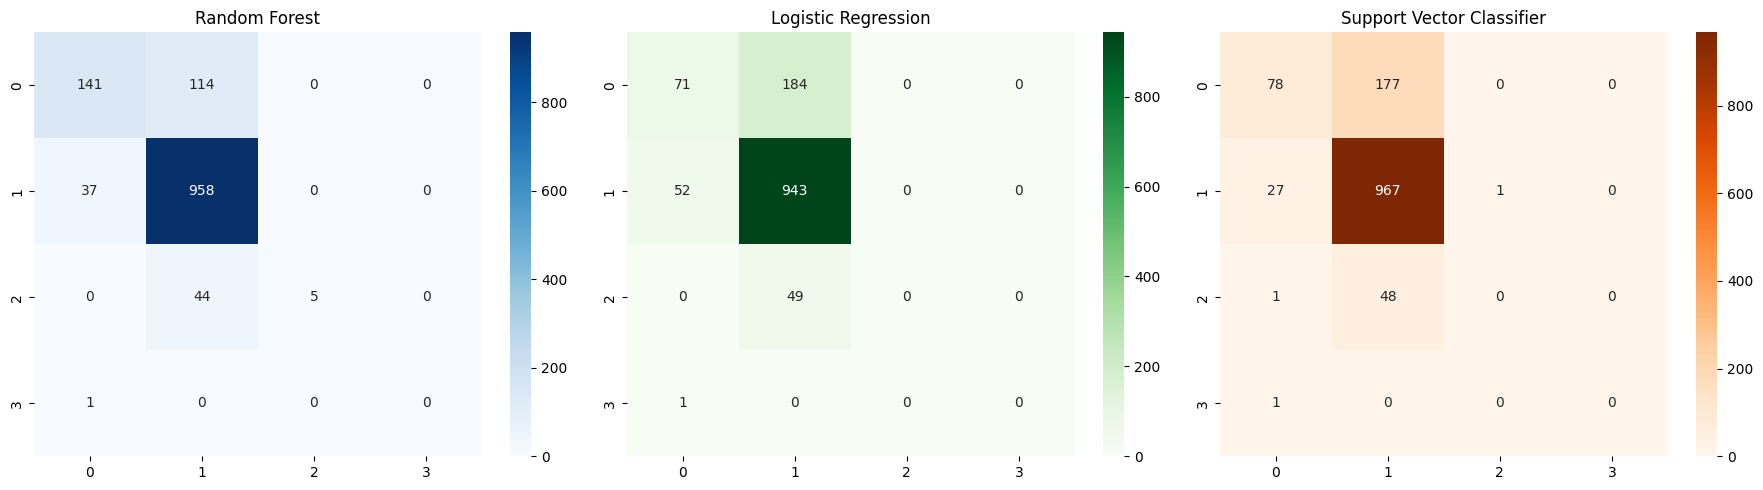

In [7]:
# Verwirrungsmatrix plotten
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", ax=axes[0], cmap="Blues")
axes[0].set_title('Random Forest')

# Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", ax=axes[1], cmap="Greens")
axes[1].set_title('Logistic Regression')

# Support Vector Classifier
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt="d", ax=axes[2], cmap="Oranges")
axes[2].set_title('Support Vector Classifier')

plt.tight_layout()
plt.show()

## 6.5 Modelle speichern

In [8]:
# Modelle abspeichern
dump(rf_model, 'app/models/random_forest_model.joblib')
dump(log_model, 'app/models/logistic_regression_model.joblib')
dump(svc_model, 'app/models/svc_model.joblib')

# Skaler speichern
dump(scaler, 'app/models/scaler.joblib')

print("Modelle und Skaler gespeichert!")

Modelle und Skaler gespeichert!


## 6.6 Analyse der Modelle
1) Random Forest
    - Stärken:
        - Gute Leistung in der Hauptklasse (mittlere Matrixwerte).
        - Wenige Fehlklassifikationen, insbesondere in den Klassen mit hoher Häufigkeit.
    - Schwächen:
        - Fehlklassifikationen in angrenzenden Klassen (z. B. Klasse 0 → Klasse 1).
        - Schwierigkeiten mit kleineren Klassen (z. B. Klasse 2).

2) Logistic Regression
    - Stärken:
        - Solide Leistung in der Hauptklasse.
        - Mehr Gleichverteilung der Fehler im Vergleich zum Random Forest.
    - Schwächen:
        - Höhere Anzahl an Fehlklassifikationen in kleineren Klassen.
        - Schwächere Gesamtleistung bei schwer zu unterscheidenden Klassen.

3) Support Vector Classifier (SVC)
    - Stärken:
        - Sehr stark in der Vorhersage der Hauptklasse.
        - Minimale Fehlklassifikationen bei großen Datenmengen.
    - Schwächen:
        - Schlechte Vorhersagen für kleine Klassen.
        - beranpassung auf die dominierende Klasse.